# A functional guide to `matplotlib` for second year students

#### Joshua Hayes, 17.07.2019



Second year labs are a step-up from first year. The experiments are more involved, the physics is often harder, and the expectations of your demonstrators are higher. One of the areas with which students have historically struggled is generating publication-quality plots. Many people have their own preferred system which they use to generate these plots, but the most common is using the Python module `matplotlib`. This notebook is intended to serve as a guide to introduce some of the core functionality of `matplotlib`. This is by no means conclusive, and for more information you should look to the matplotlib website (https://matplotlib.org/), where there are many excellent examples available, along with extensive documentiation. 

# The `matplotlib`  basics

There are many plotting libraries in many different languages available. `matplotlib` is popular partially because it is easy to pick up and use, but also very powerful once you know your way around it. `matplotlib` is inspired by the plotting routines and styles of MATLAB, which is where the name comes from. 

Basic usage of `matplotlib` involves using `Figure` and `Axes` objects. You can read more about what objects are and how they work at the end of this notebook, but for now, we will just say that you can think of a `Figure` as a canvas onto which we will put any sets of axes we will plot on, and an `Axes` object as the actual axes onto which we plot. A `Figure` contains `Axes`, and `Axes` get data plotted onto them. Also note that a `Figure` is a `matplotlib` object and a figure is a term used to describe any plot. Keep an eye on the font and watch for the capital F.

We will be working using a simple set of data:

In [23]:
import numpy as np

x = np.linspace(0,10, 11)
y = x**2 + 3

If we want to plot $x$ and $y$, we can create a `Figure` and `Axes` very easily using the `subplots` function:

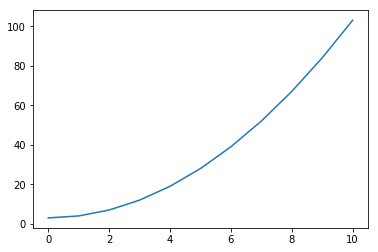

In [29]:
import matplotlib.pyplot as plt

# Create the Figure and Axes
fig, ax = plt.subplots(1,1)
# Plot the data
ax.plot(x, y)
# Show all the plots
plt.show()

Excellent, we have made our first plot! 

This is very basic though, and is missing many things which make a good figure. Adding axis labels and a title is a good place to start. Let's make the plot again, but with labels and a title:

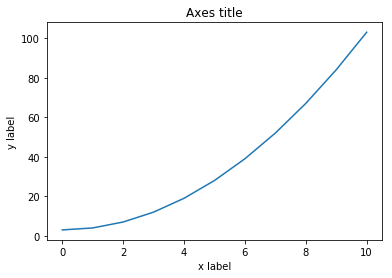

In [30]:
import matplotlib.pyplot as plt

# Create the Figure and Axes
fig, ax = plt.subplots(1,1)
# Plot the data
ax.plot(x, y)
ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.set_title('Axes title')

# Show all the plots
plt.show()

## A quick intro to object oriented programming (bonus)

This bonus section is useful for anyone who wants to understand what they are actually writing. I would recommed reading it at some point, as understanding what objects are in programming is incredibly useful. Note that this is intended to serve as an introduction to get you used to thinking about OOP, and how you might go about starting to program using OOP, rather than a fully detailed computer science course. 

Python, like C++ and Java, is an object oriented programming language. All this means is that rather than separately dealing with a lot of different variables or lists all associated with one thing, all variables associated with a thing are kept in a container, called a Class. 

To illustrate this, let's look at the example of making a catalogue of stars. We are interested in the type, temperature, and distance of a star. Without using object oriented programming, we could build our catalogue by constructing a series of lists for each attribute:

In [1]:
star_type = ['K','O','M','G']  # Stellar class
temperature = [4000,35000,2700,5500]  # Temperature of the star
distance = [1.2, 2.4, 1.8, 8.9]  # Distance to the star in kpc

If we want to print the information associated with, say, star 2 (remembering that in Python we start counting from 0), we would have to type

In [2]:
print(star_type[2], temperature[2], distance[2])

M 2700 1.8


Now, this is fine, but a little cumbersome. As we extend the number of stars in the catalogue, or the amount of information we want have on each star, you can see how even displaying the info on a star will get unwieldy. If we want to start manipulating the data, codes will swifly get very bulky and unreadable. 

What would make far more sense would be if instead of building the catalogue as a list of all the attributes, divided by stars, we just have a list of stars, and find a nice, clean way to keep all information associated with a given star in one place. This is where classes come in.

The best way to think of a class is as a container for information. A simple example of a Star class can be written like this:

In [14]:
class Star:
    def __init__(self, star_type, temperature, distance):
        '''This class is an individual star. 
        '''
        self.star_type = star_type
        self.temperature = temperature
        self.distance = distance
    
    def print_info(self):
        '''Prints the info of a star nicely'''
        print('Type = {}'.format(self.star_type))  # format() fills in the {} with whatever is in the brackets
        print('Temperature = {} K'.format(self.temperature))
        print('Distance = {} kpc'.format(self.distance))
        
    def supernova():
        print('BANG')

Here we can introduce the two features of a class: methods and attributes. Simply put, a method is a function which is contained within a class, and an attribute is a variable associated with a class. If we want to make an instance of this class, we can write

In [15]:
star1 = Star('K', 4000, 1.2)

When we call the class like this, the arguments are passed to the `__init__` function. 

If we want to access a method or attribute of a class instance, we can use the dot notation. For example:

In [12]:
# Access the temperature of star1:
star1.temperature

4000

In [13]:
# Call the print_info function:
star1.print_info()

Type = K
Temperature = 4000 K
Distance = 1.2 kpc


The protected word `self` is very important to OOP in Python. Whenever a method within a class wants to access an attribute or method which is part of the class, such as in the `print_info` function, `self` is used with the dot notation to access the method or attribute. You may have spotted that in the intialisation of star1 and in the call of `print_info`, we didn't provide a value for `self`. You never have to do this, and in documentation you can functionally ignore it as an argument when providing values to a function. 

So, if we are using `matplotlib` and plot something on the axes

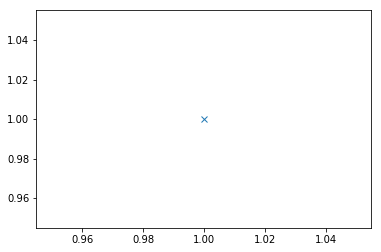

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1)

ax.plot(1, 1, 'x')

plt.show()

we can see that the axes are an object, and the line `ax.plot` is us calling a method! 

Obviously the underlying code to an `Axes` object in `matplotlib` is much more complicated than out `Star` example, but the principal is the same. If you are ever trying to work out how to change something on a plot, first consider which part of the plot you are trying to change. Adding labels to axes? You'll need to use a method from an `Axes` object. What to change the size of the figure itself? Use the `Figure` object.